In [1]:
import pandas as pd

# Load data
census_county_data = pd.read_csv("acs2015_county_data.csv", low_memory=False)
tuition_data = pd.read_csv("tuition_cost.csv")

# Clean and select relevant columns from the census data
census_county_cleaned = census_county_data.dropna(subset=['Income', 'Poverty', 'Professional'])
census_county_cleaned = census_county_cleaned[['State', 'County', 'Professional', 'Income', 'Poverty']]

# Aggregating by state
census_state_aggregated = census_county_cleaned.groupby('State', as_index=False).agg({
    'Professional': 'sum',
    'Income': 'mean',
    'Poverty': 'mean'
})

# Clean the tuition data
tuition_data_cleaned = tuition_data.dropna(subset=['in_state_tuition'])
tuition_data_cleaned = tuition_data_cleaned[['state', 'in_state_tuition', 'name']]

# Standardize the case for state names
tuition_data_cleaned['state'] = tuition_data_cleaned['state'].str.strip().str.title()
census_state_aggregated['State'] = census_state_aggregated['State'].str.strip().str.title()

# Merge the datasets on 'State' and 'state'
merged_data = pd.merge(
    census_state_aggregated,
    tuition_data_cleaned,
    left_on='State',
    right_on='state',
    how='inner'
)

# Display the merged dataset
merged_data.head(), merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2921 non-null   object 
 1   Professional      2921 non-null   float64
 2   Income            2921 non-null   float64
 3   Poverty           2921 non-null   float64
 4   state             2921 non-null   object 
 5   in_state_tuition  2921 non-null   int64  
 6   name              2921 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 159.9+ KB


(     State  Professional        Income    Poverty    state  in_state_tuition  \
 0  Alabama        1855.1  37973.134328  21.762687  Alabama              9698   
 1  Alabama        1855.1  37973.134328  21.762687  Alabama              4440   
 2  Alabama        1855.1  37973.134328  21.762687  Alabama             11068   
 3  Alabama        1855.1  37973.134328  21.762687  Alabama              6900   
 4  Alabama        1855.1  37973.134328  21.762687  Alabama              6810   
 
                                              name  
 0  Alabama Agricultural and Mechanical University  
 1              Alabama Southern Community College  
 2                        Alabama State University  
 3                              Amridge University  
 4                         Athens State University  ,
 None)

In [2]:
missing_values = merged_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

descriptive_stats = merged_data[['Professional', 'Income', 'Poverty', 'in_state_tuition']].describe()
print(descriptive_stats)

Missing values per column:
State               0
Professional        0
Income              0
Poverty             0
state               0
in_state_tuition    0
name                0
dtype: int64
       Professional        Income      Poverty  in_state_tuition
count   2921.000000   2921.000000  2921.000000       2921.000000
mean    2482.762102  49783.058952    15.967387      16607.326600
std     1496.789487   8185.784656     3.383684      14780.559032
min      105.800000  34938.926829     9.400000        480.000000
25%     1887.900000  44046.477612    13.144776       4912.000000
50%     2181.600000  50163.441176    15.334091      10355.000000
75%     3030.100000  55275.693548    18.058261      27350.000000
max     7385.400000  73014.095238    25.723171      59985.000000


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

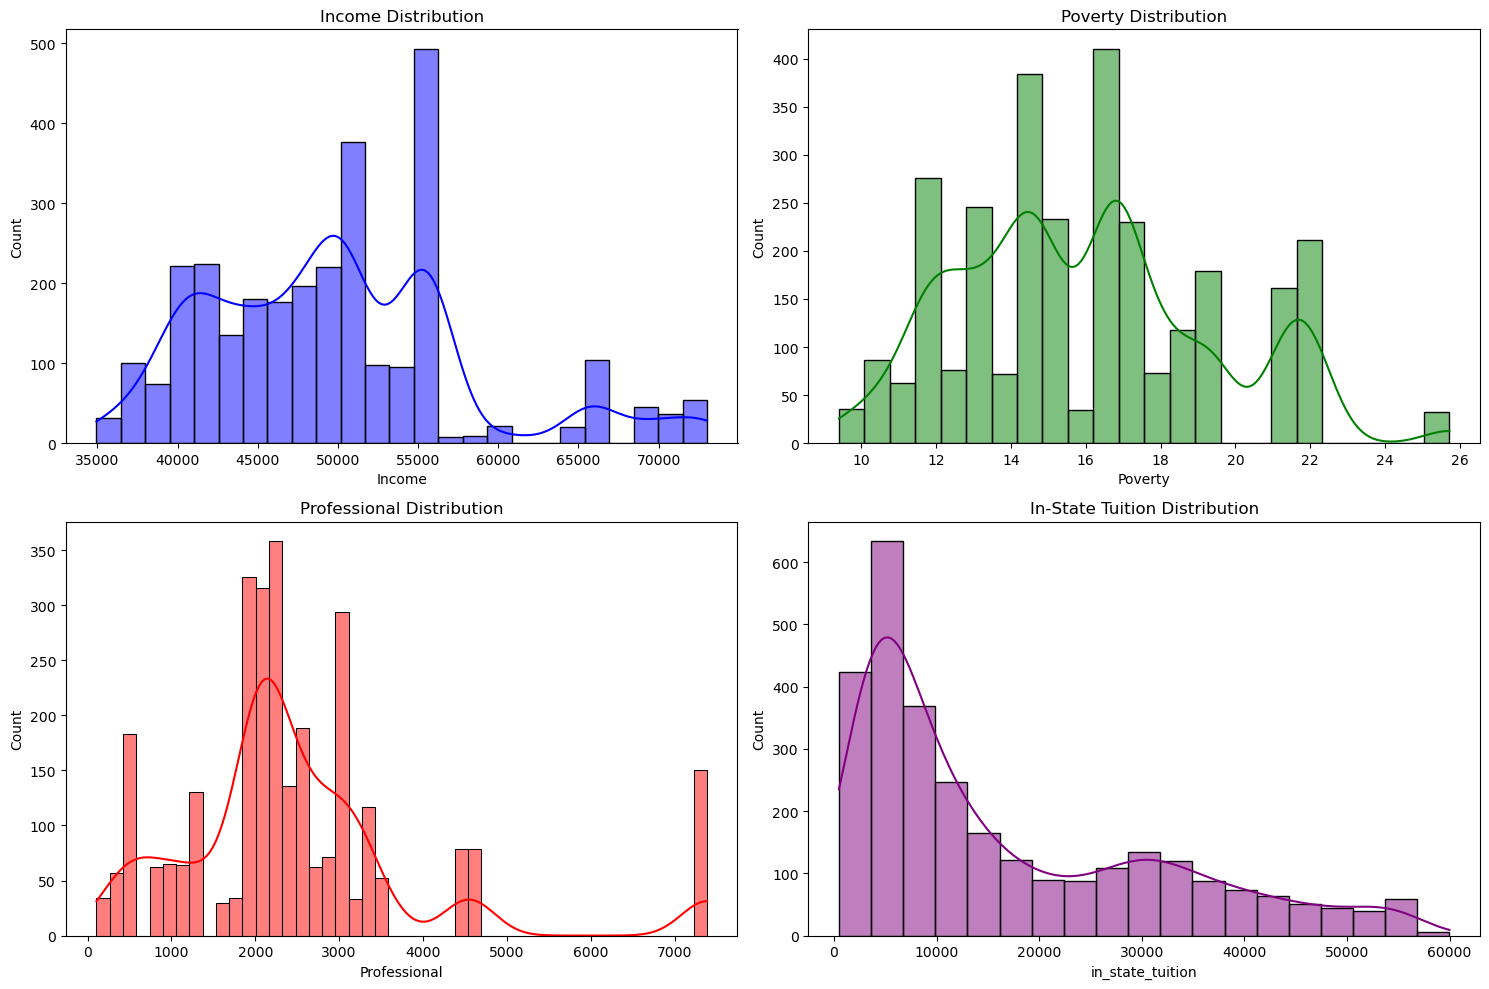

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution for 'Income'
sns.histplot(merged_data['Income'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Income Distribution')

# Distribution for 'Poverty'
sns.histplot(merged_data['Poverty'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Poverty Distribution')

# Distribution for 'Professional'
sns.histplot(merged_data['Professional'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Professional Distribution')

# Distribution for 'in_state_tuition'
sns.histplot(merged_data['in_state_tuition'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('In-State Tuition Distribution')

plt.tight_layout()
plt.show()

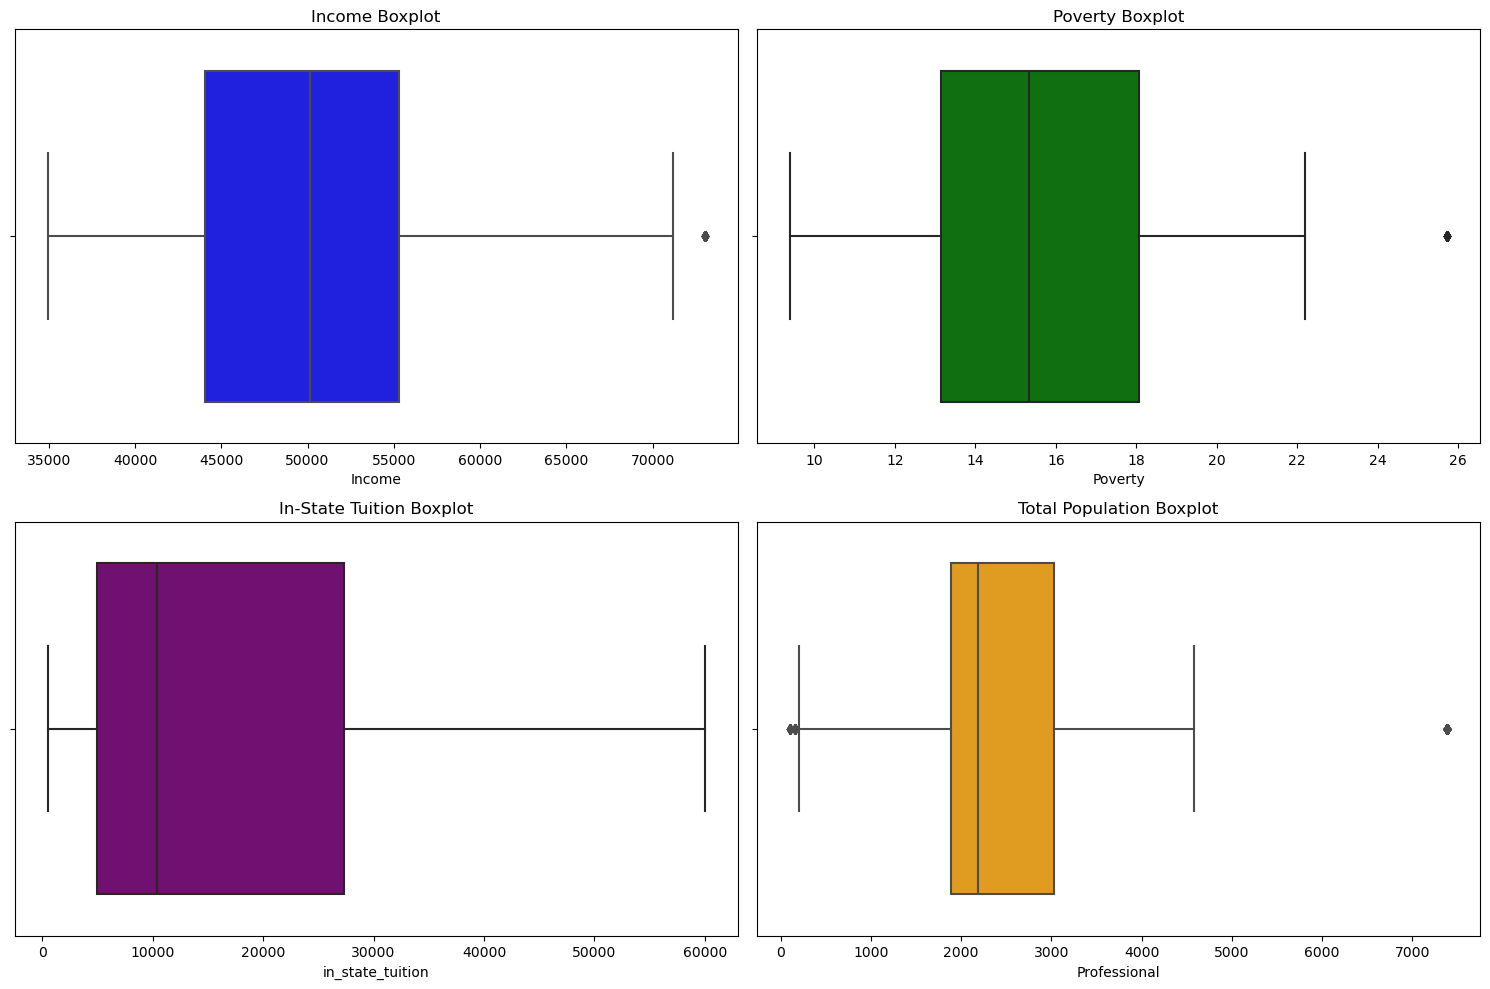

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x=merged_data['Income'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Income Boxplot')

sns.boxplot(x=merged_data['Poverty'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Poverty Boxplot')

sns.boxplot(x=merged_data['Professional'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Total Population Boxplot')

sns.boxplot(x=merged_data['in_state_tuition'], ax=axes[1, 0], color='purple')
axes[1, 0].set_title('In-State Tuition Boxplot')

plt.tight_layout()
plt.show()

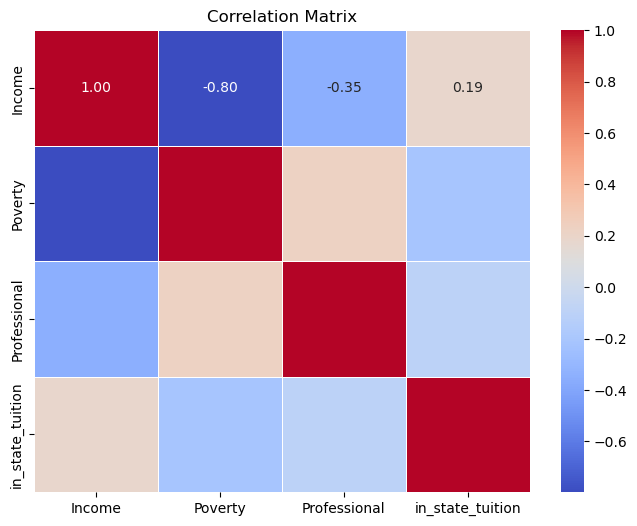

In [5]:
correlation_matrix = merged_data[['Income', 'Poverty', 'Professional', 'in_state_tuition']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

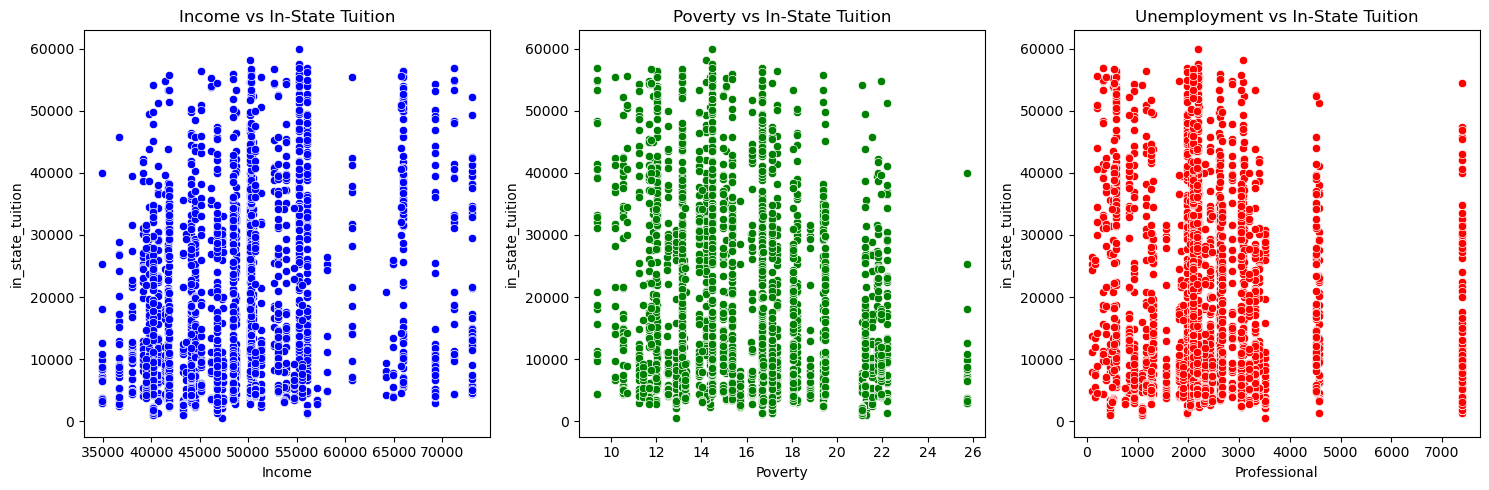

In [6]:
# Scatter plots to investigate relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=merged_data['Income'], y=merged_data['in_state_tuition'], ax=axes[0], color='blue')
axes[0].set_title('Income vs In-State Tuition')

sns.scatterplot(x=merged_data['Poverty'], y=merged_data['in_state_tuition'], ax=axes[1], color='green')
axes[1].set_title('Poverty vs In-State Tuition')

sns.scatterplot(x=merged_data['Professional'], y=merged_data['in_state_tuition'], ax=axes[2], color='red')
axes[2].set_title('Unemployment vs In-State Tuition')

plt.tight_layout()
plt.show()

In [7]:
import numpy as np

# Log transformation of skewed variables
merged_data['log_Income'] = np.log(merged_data['Income'])
merged_data['log_in_state_tuition'] = np.log(merged_data['in_state_tuition'])


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Prepare features and target
X = merged_data[['log_Income', 'Poverty', 'Professional']]
y = merged_data['log_in_state_tuition']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Train the models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict the target values
lr_pred = lr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Evaluate the models using R², RMSE, and MAE
def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

print("Evaluation of Linear Regression Model:")
evaluate_model("Linear Regression", y_test, lr_pred)

print("\nEvaluation of Ridge Regression Model:")
evaluate_model("Ridge Regression", y_test, ridge_pred)

print("\nEvaluation of Lasso Regression Model:")
evaluate_model("Lasso Regression", y_test, lasso_pred)

Evaluation of Linear Regression Model:
Linear Regression - R²: 0.0466, RMSE: 0.9898, MAE: 0.8417

Evaluation of Ridge Regression Model:
Ridge Regression - R²: 0.0461, RMSE: 0.9900, MAE: 0.8418

Evaluation of Lasso Regression Model:
Lasso Regression - R²: 0.0336, RMSE: 0.9965, MAE: 0.8461


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the data for Random Forest Regression (using log_Income and log_in_state_tuition)
X_rf = merged_data[['log_Income', 'Poverty', 'Professional']]  # Independent variables
y_rf = merged_data['log_in_state_tuition']  # Dependent variable

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Train a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_rf, y_train_rf)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test_rf)

# Evaluate the model
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

# Display the results
mse_rf, r2_rf

(0.871979331374704, 0.15141186812836593)

In [10]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_xgb = merged_data[['Income', 'Poverty', 'Professional']]  # Independent variables
y_xgb = merged_data['in_state_tuition'] 

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

# Set up the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_xgb, y_train_xgb)

# Best parameters from grid search
best_params = grid_search.best_params_

# Predict with the best model
y_pred_best = grid_search.predict(X_test_xgb)

# Evaluate the model with the best parameters
mse_best = mean_squared_error(y_test_xgb, y_pred_best)
r2_best = r2_score(y_test_xgb, y_pred_best)

# Display the results
print("Best Parameters:", best_params)
print("Mean Squared Error:", mse_best)
print("R²:", r2_best)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error: 214054309.3853207
R²: 0.08207031593149516


In [11]:
merged_data['school_type'] = merged_data['name'].apply(lambda x: 'Public' if 'State' in x else 'Private')

# Step 2: Split data into public and private schools
public_schools = merged_data[merged_data['school_type'] == 'Public']
private_schools = merged_data[merged_data['school_type'] == 'Private']

# Step 3: Check basic statistics for both public and private schools
print("Public Schools Stats:")
print(public_schools.describe())

print("\nPrivate Schools Stats:")
print(private_schools.describe())

Public Schools Stats:
       Professional        Income     Poverty  in_state_tuition  log_Income  \
count    317.000000    317.000000  317.000000        317.000000  317.000000   
mean    2452.470662  47805.143941   16.706191       7718.488959   10.761752   
std     1272.705567   8064.028197    3.625332       3390.639718    0.159710   
min      105.800000  34938.926829    9.400000       1376.000000   10.461357   
25%     1887.900000  41411.781250   14.210784       5088.000000   10.631321   
50%     2207.100000  47322.209524   16.670690       7289.000000   10.764735   
75%     2655.100000  51263.187500   19.370000       9294.000000   10.844728   
max     7385.400000  73014.095238   25.723171      27750.000000   11.198408   

       log_in_state_tuition  
count            317.000000  
mean               8.856990  
std                0.444197  
min                7.226936  
25%                8.534640  
50%                8.894122  
75%                9.137124  
max               10.23099

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

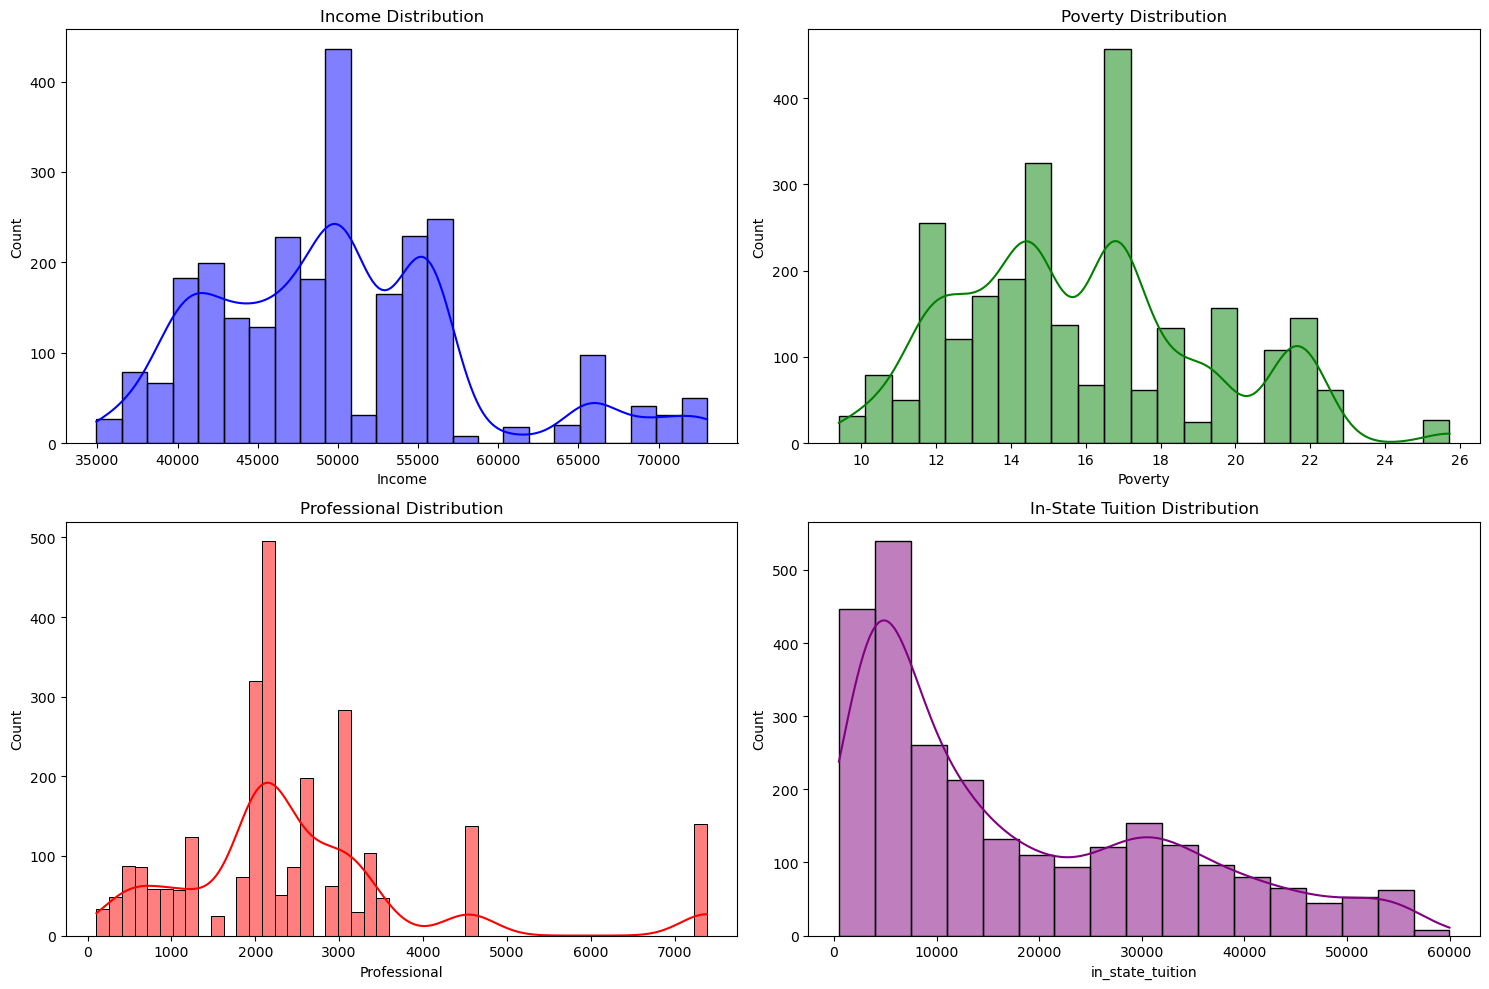

In [12]:
# Plot histograms for key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution for 'Income'
sns.histplot(private_schools['Income'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Income Distribution')

# Distribution for 'Poverty'
sns.histplot(private_schools['Poverty'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Poverty Distribution')

# Distribution for 'Professional'
sns.histplot(private_schools['Professional'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Professional Distribution')

# Distribution for 'in_state_tuition'
sns.histplot(private_schools['in_state_tuition'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('In-State Tuition Distribution')

plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

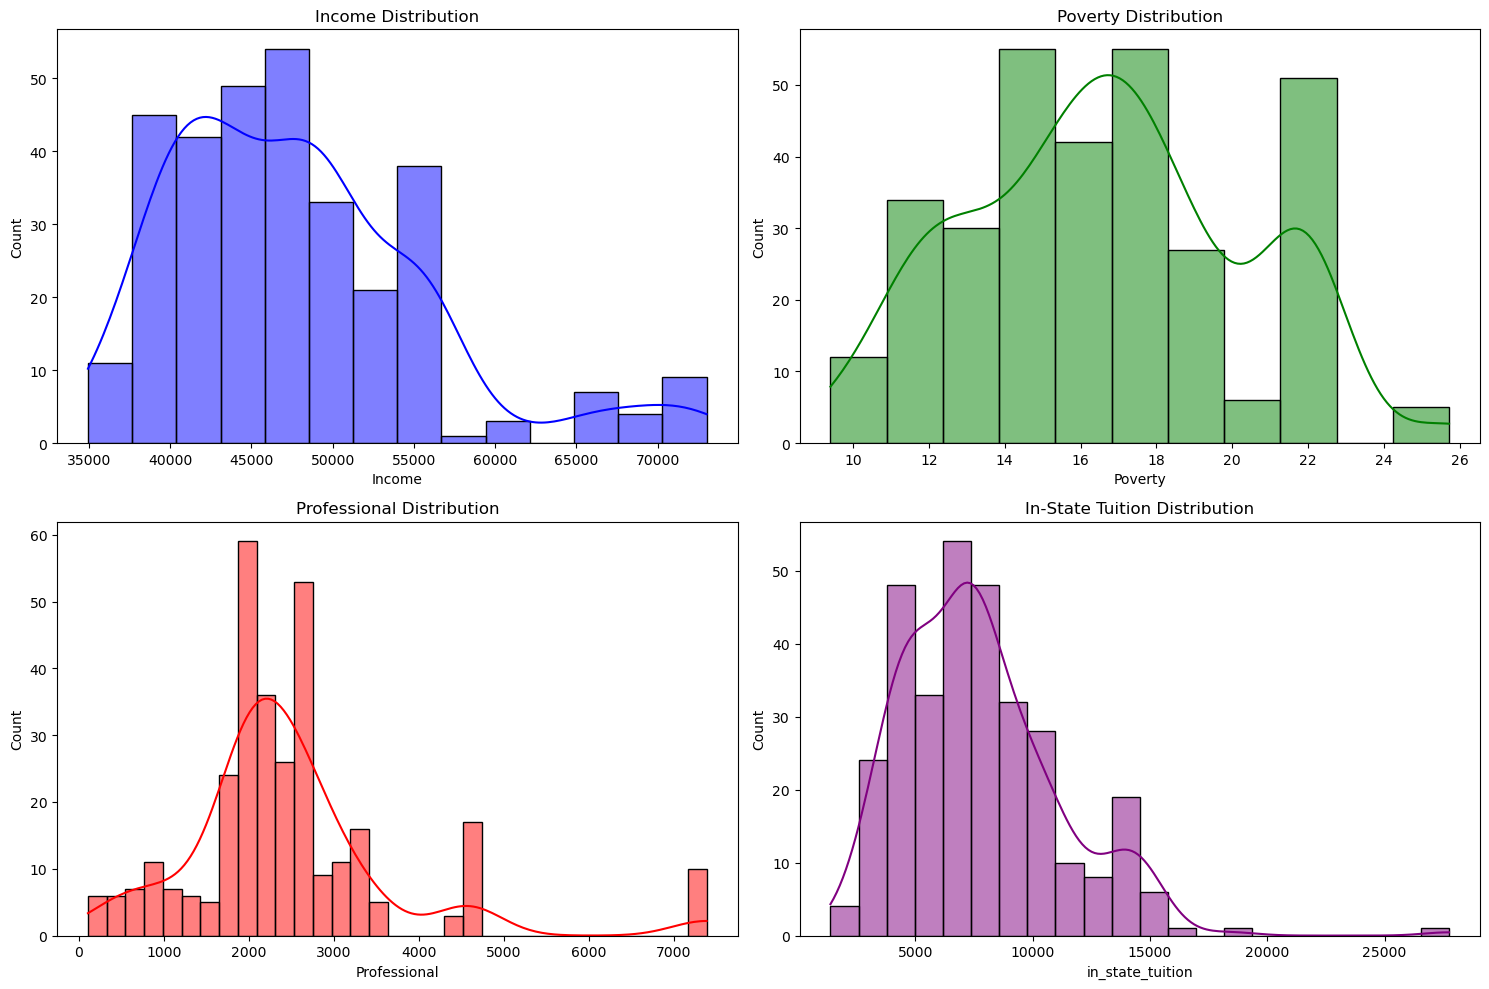

In [13]:
# Plot histograms for key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution for 'Income'
sns.histplot(public_schools['Income'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Income Distribution')

# Distribution for 'Poverty'
sns.histplot(public_schools['Poverty'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Poverty Distribution')

# Distribution for 'Professional'
sns.histplot(public_schools['Professional'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Professional Distribution')

# Distribution for 'in_state_tuition'
sns.histplot(public_schools['in_state_tuition'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('In-State Tuition Distribution')

plt.tight_layout()
plt.show()

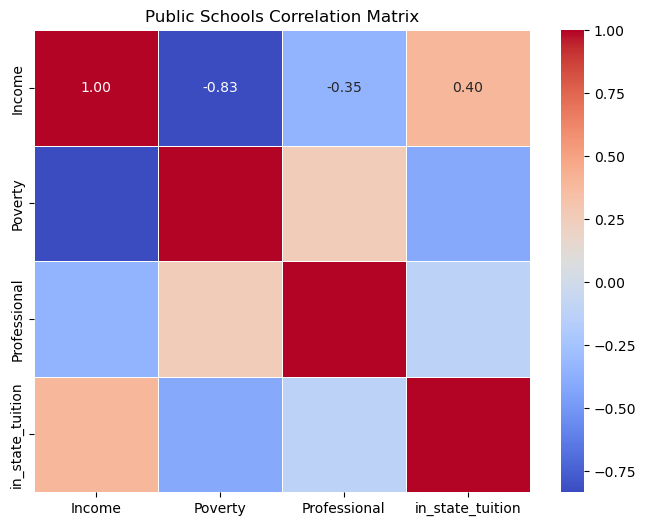

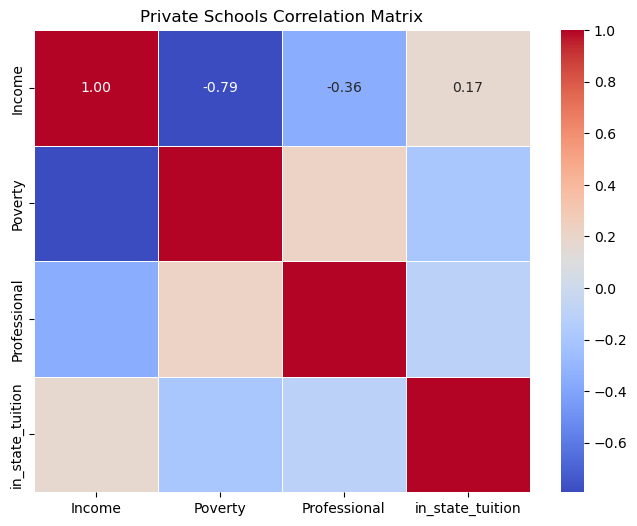

In [14]:
correlation_public = public_schools[['Income', 'Poverty', 'Professional', 'in_state_tuition']].corr()

# Plot the heatmap for public schools
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_public, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Public Schools Correlation Matrix')
plt.show()

# Calculate the correlation matrix for private schools
correlation_private = private_schools[['Income', 'Poverty', 'Professional', 'in_state_tuition']].corr()

# Plot the heatmap for private schools
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_private, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Private Schools Correlation Matrix')
plt.show()

In [15]:
# Prepare features and target
X = public_schools[['log_Income', 'Poverty', 'Professional']]
y = public_schools['log_in_state_tuition']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Train the models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict the target values
lr_pred = lr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Evaluate the models using R², RMSE, and MAE
def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

print("Evaluation of Linear Regression Model:")
evaluate_model("Linear Regression", y_test, lr_pred)

print("\nEvaluation of Ridge Regression Model:")
evaluate_model("Ridge Regression", y_test, ridge_pred)

print("\nEvaluation of Lasso Regression Model:")
evaluate_model("Lasso Regression", y_test, lasso_pred)

Evaluation of Linear Regression Model:
Linear Regression - R²: 0.1706, RMSE: 0.3919, MAE: 0.3100

Evaluation of Ridge Regression Model:
Ridge Regression - R²: 0.1619, RMSE: 0.3939, MAE: 0.3115

Evaluation of Lasso Regression Model:
Lasso Regression - R²: 0.1404, RMSE: 0.3990, MAE: 0.3141


In [16]:
# Prepare the data for Random Forest Regression (using log_Income and log_in_state_tuition)
X_rf = public_schools[['log_Income', 'Poverty', 'Professional']]  # Independent variables
y_rf = public_schools['log_in_state_tuition']  # Dependent variable

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Train a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_rf, y_train_rf)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test_rf)

# Evaluate the model
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

# Display the results
mse_rf, r2_rf

(0.10125102130845856, 0.45322971013135105)

In [17]:
# Prepare the data for XGBoost Regression (using log-transformed data for public schools)
X_public = public_schools[['Income', 'Poverty', 'Professional']]  # Independent variables
y_public = public_schools['log_in_state_tuition']  # Dependent variable

# Split the data into training and testing sets
X_train_public, X_test_public, y_train_public, y_test_public = train_test_split(X_public, y_public, test_size=0.2, random_state=42)

# Train an XGBoost Regression model for public schools
xgb_regressor_public = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor_public.fit(X_train_public, y_train_public)

# Predict on the test set
y_pred_public = xgb_regressor_public.predict(X_test_public)

# Evaluate the model
mse_public = mean_squared_error(y_test_public, y_pred_public)
r2_public = r2_score(y_test_public, y_pred_public)

# Display the results
print("MSE for Public Schools:", mse_public)
print("R² for Public Schools:", r2_public)

MSE for Public Schools: 0.11072500610101013
R² for Public Schools: 0.4020688097839503


In [18]:
# Prepare features and target
X = private_schools[['log_Income', 'Poverty', 'Professional']]
y = private_schools['log_in_state_tuition']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Train the models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict the target values
lr_pred = lr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Evaluate the models using R², RMSE, and MAE
def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

print("Evaluation of Linear Regression Model:")
evaluate_model("Linear Regression", y_test, lr_pred)

print("\nEvaluation of Ridge Regression Model:")
evaluate_model("Ridge Regression", y_test, ridge_pred)

print("\nEvaluation of Lasso Regression Model:")
evaluate_model("Lasso Regression", y_test, lasso_pred)

Evaluation of Linear Regression Model:
Linear Regression - R²: 0.0471, RMSE: 1.0086, MAE: 0.8864

Evaluation of Ridge Regression Model:
Ridge Regression - R²: 0.0468, RMSE: 1.0087, MAE: 0.8865

Evaluation of Lasso Regression Model:
Lasso Regression - R²: 0.0343, RMSE: 1.0153, MAE: 0.8892


In [19]:
# Prepare the data for Random Forest Regression (using log_Income and log_in_state_tuition)
X_rf = private_schools[['log_Income', 'Poverty', 'Professional']]  # Independent variables
y_rf = private_schools['log_in_state_tuition']  # Dependent variable

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Train a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_rf, y_train_rf)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test_rf)

# Evaluate the model
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

# Display the results
mse_rf, r2_rf

(0.9665554084935122, 0.09458802803224342)

In [20]:
# Prepare the data for XGBoost Regression (using log-transformed data for public schools)
X_public = private_schools[['Income', 'Poverty', 'Professional']]  # Independent variables
y_public = private_schools['log_in_state_tuition']  # Dependent variable

# Split the data into training and testing sets
X_train_public, X_test_public, y_train_public, y_test_public = train_test_split(X_public, y_public, test_size=0.2, random_state=42)

# Train an XGBoost Regression model for public schools
xgb_regressor_public = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor_public.fit(X_train_public, y_train_public)

# Predict on the test set
y_pred_public = xgb_regressor_public.predict(X_test_public)

# Evaluate the model
mse_public = mean_squared_error(y_test_public, y_pred_public)
r2_public = r2_score(y_test_public, y_pred_public)

# Display the results
print("MSE for Private Schools:", mse_public)
print("R² for Private Schools:", r2_public)

MSE for Private Schools: 0.9654703576956373
R² for Private Schools: 0.09560443948052266


In [21]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Prepare the datasets for private and public schools
X_private = private_schools[['log_Income', 'Poverty', 'Professional']]
y_private = private_schools['log_in_state_tuition']
X_public = public_schools[['log_Income', 'Poverty', 'Professional']]
y_public = public_schools['log_in_state_tuition']

# Train-test split for private and public schools
X_train_private, X_test_private, y_train_private, y_test_private = train_test_split(X_private, y_private, test_size=0.2, random_state=42)
X_train_public, X_test_public, y_train_public, y_test_public = train_test_split(X_public, y_public, test_size=0.2, random_state=42)

# Define SVM and ANN hyperparameter spaces
svm_param_grid = {
    'C': np.logspace(-2, 2, 10),
    'epsilon': np.linspace(0.1, 1.0, 10),
    'kernel': ['linear', 'rbf', 'poly']
}

ann_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': np.logspace(-4, -2, 10),
    'max_iter': [200, 300, 500]
}

# Initialize models
svm_model = SVR()
ann_model = MLPRegressor(random_state=42)

# Perform Randomized Search for Private Schools
random_search_svm_private = RandomizedSearchCV(svm_model, svm_param_grid, n_iter=30, scoring='neg_mean_squared_error', cv=3, random_state=42)
random_search_ann_private = RandomizedSearchCV(ann_model, ann_param_grid, n_iter=30, scoring='neg_mean_squared_error', cv=3, random_state=42)

random_search_svm_private.fit(X_train_private, y_train_private)
random_search_ann_private.fit(X_train_private, y_train_private)

# Perform Randomized Search for Public Schools
random_search_svm_public = RandomizedSearchCV(svm_model, svm_param_grid, n_iter=30, scoring='neg_mean_squared_error', cv=3, random_state=42)
random_search_ann_public = RandomizedSearchCV(ann_model, ann_param_grid, n_iter=30, scoring='neg_mean_squared_error', cv=3, random_state=42)

random_search_svm_public.fit(X_train_public, y_train_public)
random_search_ann_public.fit(X_train_public, y_train_public)

# Capture the best parameters and performance scores
best_params_private = {
    'SVM': random_search_svm_private.best_params_,
    'ANN': random_search_ann_private.best_params_
}
best_scores_private = {
    'SVM': -random_search_svm_private.best_score_,
    'ANN': -random_search_ann_private.best_score_
}

best_params_public = {
    'SVM': random_search_svm_public.best_params_,
    'ANN': random_search_ann_public.best_params_
}
best_scores_public = {
    'SVM': -random_search_svm_public.best_score_,
    'ANN': -random_search_ann_public.best_score_
}

# Evaluate on test data
svm_private_test_pred = random_search_svm_private.best_estimator_.predict(X_test_private)
ann_private_test_pred = random_search_ann_private.best_estimator_.predict(X_test_private)

svm_public_test_pred = random_search_svm_public.best_estimator_.predict(X_test_public)
ann_public_test_pred = random_search_ann_public.best_estimator_.predict(X_test_public)

test_scores_private = {
    'SVM': mean_squared_error(y_test_private, svm_private_test_pred),
    'ANN': mean_squared_error(y_test_private, ann_private_test_pred)
}

test_scores_public = {
    'SVM': mean_squared_error(y_test_public, svm_public_test_pred),
    'ANN': mean_squared_error(y_test_public, ann_public_test_pred)
}

best_params_private, best_scores_private, test_scores_private, best_params_public, best_scores_public, test_scores_public


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

({'SVM': {'kernel': 'linear', 'epsilon': 0.4, 'C': 0.01},
  'ANN': {'solver': 'adam',
   'max_iter': 500,
   'learning_rate_init': 0.0002782559402207126,
   'hidden_layer_sizes': (100, 100),
   'activation': 'tanh'}},
 {'SVM': 1.0266575162974942, 'ANN': 1.0480621648335942},
 {'SVM': 1.0686402039390719, 'ANN': 1.0462200175383114},
 {'SVM': {'kernel': 'linear', 'epsilon': 0.5, 'C': 0.027825594022071243},
  'ANN': {'solver': 'sgd',
   'max_iter': 200,
   'learning_rate_init': 0.005994842503189409,
   'hidden_layer_sizes': (50, 50),
   'activation': 'tanh'}},
 {'SVM': 0.1667038249706583, 'ANN': 0.19874486494635965},
 {'SVM': 0.16438317431587302, 'ANN': 0.18774943107600728})

In [22]:
# Best SVM and ANN models for public and private institutions
best_svm_private = random_search_svm_private.best_estimator_
best_ann_private = random_search_ann_private.best_estimator_
best_svm_public = random_search_svm_public.best_estimator_
best_ann_public = random_search_ann_public.best_estimator_

# Predictions for the test sets
svm_private_test_pred = best_svm_private.predict(X_test_private)
ann_private_test_pred = best_ann_private.predict(X_test_private)
svm_public_test_pred = best_svm_public.predict(X_test_public)
ann_public_test_pred = best_ann_public.predict(X_test_public)

# Calculate R2 scores
r2_scores = {
    "SVM_Private": r2_score(y_test_private, svm_private_test_pred),
    "ANN_Private": r2_score(y_test_private, ann_private_test_pred),
    "SVM_Public": r2_score(y_test_public, svm_public_test_pred),
    "ANN_Public": r2_score(y_test_public, ann_public_test_pred),
}

r2_scores


{'SVM_Private': -0.0010389739379284002,
 'ANN_Private': 0.01996293138753691,
 'SVM_Public': 0.11230687148920704,
 'ANN_Public': -0.013874324678308403}